In [1]:
import matplotlib.pyplot as plt

In [13]:
import numpy as np
nk=np.array([[8,1,2],[3,4,5]])
nk.sum(axis=1)
#print(np.allclose([1,np.nan],[1,np.nan]))
#print(np.arrange(0,10,2))

array([11, 12])

In [14]:
import pandas as pd
pdf=pd.Series(list("abcdefghijklmnopqrstuvwxyz"))
pos=[8,14]

In [2]:
import numpy as np
import seaborn as sns

In [3]:
import csv as csv

In [3]:
import os
a=np.array([[1],[9]])
b=np.array([2,0])
print(b)
g=np.hstack((a,b))

[2 0]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [3]:
#zero
with open("C:/Users/SHUBHAJOY/Desktop/Assessment-task-1/data/digitData0.csv") as f:
    digit0=list(csv.reader(f,delimiter=","))
    digit0= np.array(digit0[1:], dtype=np.float)
j1=[]
for x in range(0,len(digit0)):
     j1.append([0])
j2=np.array(j1)
#np.append(wines,j,axis=1)
print(digit0[0])
digit0_1=np.hstack((digit0,j2))
print(digit0_1[0])
#one
'''
with open("C:/Users/SHUBHAJOY/Desktop/Assessment-task-1/data/digitData1.csv") as f:
    digit1=list(csv.reader(f,delimiter=","))
    digit1= np.array(digit1[1:], dtype=np.float)
j=[]
for t in range(0,len(digit1)):
    
    j.append(1)
j1=np.array(j)
#np.append(wines,j,axis=1)    
print(digit1.size)
print(j1.size)
#two
digit1_1=np.hstack((digit1,j1))

with open("C:/Users/SHUBHAJOY/Desktop/Assessment-task-1/data/digitData2.csv") as f:
    digit2=list(csv.reader(f,delimiter=","))
    digit2= np.array(digit2[1:], dtype=np.float)
j=[]
for t in range(0,len(digit2)):
    
    j.append(2)
j=np.array(j)
#np.append(wines,j,axis=1)    
#print(j)
digit2_1=np.hstack((digit2,j))
#three
with open("C:/Users/SHUBHAJOY/Desktop/Assessment-task-1/data/digitData3.csv") as f:
    digit3=list(csv.reader(f,delimiter=","))
    digit3= np.array(digit3[1:], dtype=np.float)
j=[]
for t in range(0,len(digit3)):
    
    j.append(3)
j=np.array(j)
#np.append(wines,j,axis=1)    
#print(j)

digit3_1=np.hstack((digit3,j))
#four
with open("C:/Users/SHUBHAJOY/Desktop/Assessment-task-1/data/digitData4.csv") as f:
    digit4=list(csv.reader(f,delimiter=","))
    digit4= np.array(digit4[1:], dtype=np.float)
j=[]
for t in range(0,len(digit4)):
    
    j.append(4)
j=np.array(j)
#np.append(wines,j,axis=1)    
#print(j)
digit4_1=np.hstack((digit4,j))
final=np.vstack((digit0,digit1,digit2,digit3,digit4))
print(final[0])
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0,n_init=50).fit(final)
#print(kmeans.predict(digit4[0]))
'''

NameError: name 'csv' is not defined

In [5]:
from numpy import genfromtxt

In [6]:
my_data = genfromtxt('C:/Users/SHUBHAJOY/Desktop/Assessment-task-1/data/digitData0.csv', delimiter=',')

In [7]:
import scipy.misc
my_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.,  0.])

In [8]:
scipy.misc.imsave('outfile.jpg', my_data[0])

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


ValueError: 'arr' does not have a suitable array shape for any mode.

In [26]:
import opencv as cv2

ModuleNotFoundError: No module named 'opencv'

In [3]:
import cv2 as cv
from skimage import *

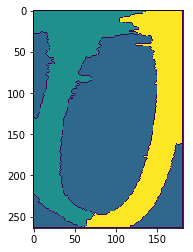

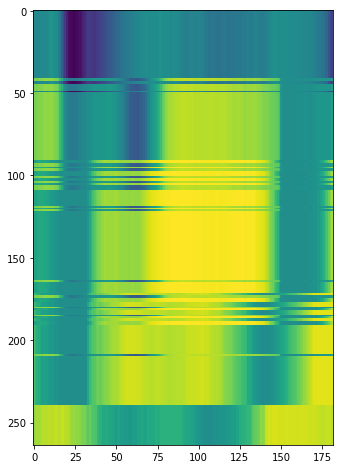

In [4]:
import os
from PIL import Image
path=""
fg=[]
fgh=[]
def split_image(image):
    r=image[:,:,:2]
    return r
for t in range(0,9):
    path="C:/Users/SHUBHAJOY/Downloads/synthetic-digits/synthetic_digits/imgs_train/"+str(t)
    for root, dirs, files in os.walk(path):
        for filename in files:
            fgh.append(cv.imread(os.path.join(path,filename)))
            fg.append(cv.imread(os.path.join(path,filename),cv.IMREAD_GRAYSCALE))
ret, thresh = cv.threshold(fg[500],0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=6)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv.watershed(fgh[500],markers)
fgh[500][markers == 1] = [255,0,0]
plt.imshow(markers)
plt.show()
#Kmeans algorithm

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(fg[500])
cluster_centers=kmeans.cluster_centers_
cluster_labels = kmeans.labels_
imk=cluster_centers[cluster_labels]
yu=kmeans.predict(fg[500])
plt.figure(figsize = (15,8))
plt.imshow(imk)
plt.show()

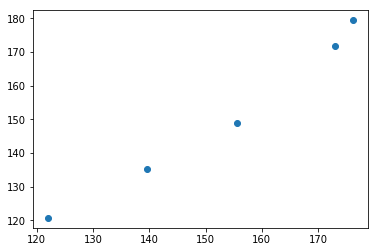

In [5]:
import matplotlib.pyplot as plt
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1])

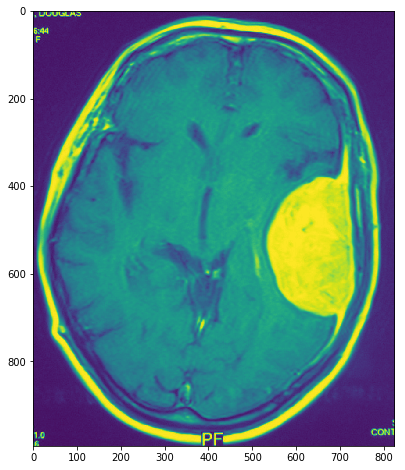

1


C:\Users\SHUBHAJOY\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\SHUBHAJOY\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\SHUBHAJOY\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000


'if(xr>fit3 and xr<fit4):\n                        hj1=three1\n                        g1=0\n                        xr1=random.randrange(int(fit4),int(sum2))\n                        xr2=random.randrange(int(fit2),int(fit3))\n                        if(xr1<xr2):\n                            xr1=xr2                            \n                        if(xr1>fit2 and xr1<fit3):\n                            hj2=three1\n                        elif(xr1>fit4):\n                            hj2=four1'

In [85]:
path="C:/Users/SHUBHAJOY/Downloads/brain-mri-images-for-brain-tumor-detection/yes/"
fg1=[]
for root, dirs, files in os.walk(path):
        for filename in files:
            fgh2.append(cv.imread(os.path.join(path,filename)))
            fg1.append(cv.imread(os.path.join(path,filename),cv.IMREAD_GRAYSCALE))
np1=np.full_like(fg1[5],1)
img1=np.full_like(fg1[5],1)
import random
def show_image(imk1):
    plt.figure(figsize = (25,8))
    plt.imshow(imk1)
    plt.show()

c1=1
show_image(fg1[5])
def generate_initial(img):
    c=1
    c1=10.0
    c2=170.0
    c3=370.0
    c4=40.0
    c5=250.0
    #print(img.shape)
    for t in range(0,img.shape[0]-1):
        
        for t1 in range(0,img.shape[1]-1):
            if(t1<70):
                img1[t][t1]=c1
            if(t1>=70 and t1<=150):
                img1[t][t1]=c2
            if(t1>150):
                img1[t][t1]=c3
    return img1       
imkl=generate_initial(fg1[5])
#show_image(imkl)
one=[]
two=[]
three=[]
four=[]
five=[]
six=[]
seven=[]
eight=[]
nine=[]
ten=[]
one_d=0
two_d=0
three_d=0
four_d_x=0
five_d_x=0
six_d_x=0
seven_d_x=0
eight_d_x=0
nine_d_x=0
ten_d_x=0
one_d_x=[]
two_d_x=[]
three_d_x=[]
four_d_x=[]
five_d_x=[]
six_d_x=[]
seven_d_x=[]
eight_d_x=[]
nine_d_x=[]
ten_d_x=[]
one_d_y=[]
two_d_y=[]
three_d_y=[]
four_d_y=[]
five_d_y=[]
six_d_y=[]
seven_d_y=[]
eight_d_y=[]
nine_d_y=[]
ten_d_y=[]
std1=0
std2=0
std3=0
std4=0
std5=0
import statistics
#show_image(fg[2])
def fitness(img,img1,i):
    if(i==1):
        for t in range(0,int((img1.shape[0]-1))):
            for t1 in range(0,int((img1.shape[1]-1))):
                if(img[t][t1]==10):
                    {
                         one.append(img1[t][t1])
                    
                    }
                if(img[t][t1]==170):
                    {
                        
                         two.append(img1[t][t1])
                         
                    }
                if(img[t][t1]==370):
                    {
                        three.append(img1[t][t1])
                    }          
         
    std1=np.std(one)
    std2=np.std(two)
    std3=np.std(three)
    x=0
    y=0
    z=0
    for t in one:
            x=x+int(t)-std1/(len(one))
    for t1 in two:
            y=y+int(t)-std2/(len(two))
    for t2 in three:
            z=z+int(t2)+std3/len(three)
    return x,y,z,one,two,three
    
    
    
    #return fit2,fit3,fit4    
def crossover(ch1,ch2):
    if(len(ch1)>0 and len(ch2)>0):
        x1=random.randrange(0,len(ch1)-1)
        x2=random.randrange(0,len(ch2)-1)
        ch11=[]
        ch22=[]
        ch11=ch1[0:x1]
        ch21=ch2[0:x2]
        ch12=ch1[x1:len(ch1)-1]
        ch22=ch1[x2:len(ch2)-1]
        ch11.extend(ch22)
        ch21.extend(ch12)
        return ch11,ch22
def mutate(ch1,v):
    for t in range(0,len(ch1)):
        x=random.randrange(0,len(ch1))
        y=random.randrange(0,len(ch1))
        y1=random.randrange(0,len(ch1))
        y2=random.randrange(0,len(ch1))
        y3=random.randrange(0,len(ch1))
        y4=random.randrange(0,len(ch1))
        y5=random.randrange(0,len(ch1))
        y6=random.randrange(0,len(ch1))
        y7=random.randrange(0,len(ch1))
        y8=random.randrange(0,len(ch1))

        ch1[x]=random.randrange(0,3)
        ch1[y]=random.randrange(0,3)
        ch1[y1]=random.randrange(0,3)
        ch1[y2]=random.randrange(0,3)
        ch1[y3]=random.randrange(0,3)
        ch1[y4]=random.randrange(0,3)
        ch1[y5]=random.randrange(0,3)
        ch1[y6]=random.randrange(0,3)
        ch1[y7]=random.randrange(0,3)
        ch1[y8]=random.randrange(0,3)
    return ch1

def gen_img_from_list(l1,l2,l3,l4):
    k=[]
    for t in l1:
        k.append(t)
    for t1 in l2:
        k.append(t1)
    for t2 in l3:
        k.append(t2)
    for t in l4:
        k.append(t)
#fit2,fit3,fit4,fit5=fitness(imk,imkl)
#gen_img_from_list(two,three,four,five)
three1=[]
four1=[]
def Mating_Pool():
    i=0
    while(i<2000):
        i+=1
        print(i)
        fit2,fit3,fit4,one,two,three=fitness(imkl,fg1[5],i)   
        sum2=fit2+fit3+fit4
        xr=random.randrange(int(fit2),int(sum2))
        g1=0
        f=0
        if(xr>fit2 and xr<fit3):
                    hj1=two
                    hj2=one
                    two,one=crossover(hj1,hj2)
                    if(random.randint(0,1)>0.50):
                        two=mutate(two,random.randint(100,500)%10)
                    
                    ''' g1=0
                    xr1=random.randrange(int(fit2),int(fit3))
                    if(xr1>fit2 and xr1<fit3):
                        hj2=one
                        hj1=two'''
                    
        if(xr>fit3 and xr<fit4):
                    hj1=two
                    hj2=three
                    two,three=crossover(hj1,hj2)
                    if(random.randint(0,1)>0.50):
                        three=mutate(three,random.randint(100,500)%10)
                    '''xr1=random.randrange(int(fit3),)
                    xr2=random.randrange(int(fit2),int(fit3))
                    if(xr1<xr2):
                            hj2=one                            
                    if(xr1>0 and xr1<fit2):
                            hj2=one
                    elif(xr1>fit2 and xr1<fit3):
                            hj2=two
                            hj1=one'''
                    
        if(xr>fit4):
                hj1=one
                hj2=three
                if(len(hj1)>0 and len(hj2)>0):
                    one,three=crossover(hj1,hj2)
                    if(random.randint(0,1)>0.50):
                        one=mutate(one,random.randint(100,500)%10)
#generate_final(np1)
Mating_Pool()             
'''if(xr>fit3 and xr<fit4):
                        hj1=three1
                        g1=0
                        xr1=random.randrange(int(fit4),int(sum2))
                        xr2=random.randrange(int(fit2),int(fit3))
                        if(xr1<xr2):
                            xr1=xr2                            
                        if(xr1>fit2 and xr1<fit3):
                            hj2=three1
                        elif(xr1>fit4):
                            hj2=four1'''  
            

                    




In [101]:
test=np.full_like(fg1[5],1)
c=0
c1=0
print(type(fg1[5]))
show_image(np.array(three).reshape((496,162)))

#one=one.extend(two)
#print(one.shape)
#one.extend(three)
#print(one.shape)
'''for t in range(0,test.shape[0]):
    for t1 in range(0,test.shape[1]):
        if(c<len(one)):
            
            test[t][t1]=one[c]
            c+=1
            c1+=1

        elif(c>=len(one) and c<len(two)):
            test[t][t1]=two[c]
            c+=1
            c1+=1
        else:
            if(c<len(three)):
                test[t][t1]=three[c]
                c+=1
                c1+=1
'''
#show_image(test)

<class 'numpy.ndarray'>


ValueError: cannot reshape array of size 0 into shape (496,162)

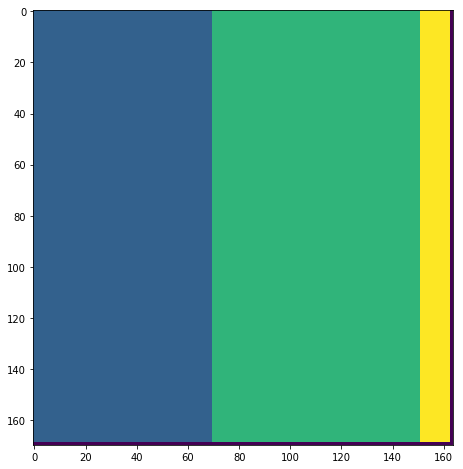

[[10 10 10 ... 30 30  1]
 [10 10 10 ... 30 30  1]
 [10 10 10 ... 30 30  1]
 ...
 [10 10 10 ... 30 30  1]
 [10 10 10 ... 30 30  1]
 [ 1  1  1 ...  1  1  1]]


IndexError: index 2028 is out of bounds for axis 0 with size 2028

In [22]:
tw_arr=np.array(two1)
three_arr=np.array(three1)
four_arr=np.array(four1)
c1=0
c2=0
c3=0
c4=0
show_image(imkl)
print(imkl)
for t in range(0,imkl.shape[0]-1):
        
        for t1 in range(0,imkl.shape[1]-1):
            if(t1<50):
                imkl[t][t1]=tw_arr[c1]
                c1+=1
            if(t1>=50 and t1<=100):
                imkl[t][t1]=three_arr[c2]
                c2+=1
            if(t1>100):
                imkl[t][t1]=four_arr[c3]
                c3+=1
            


show_image(imkl)
print(imkl)

In [ ]:
                img[t][t1]=c1
def generate_final(img):
    hj=[]
    hj=one
    c=0
    for t in range(0,img.shape[0]-1):
        
        for t1 in range(0,img.shape[1]-1):
            if(t%25!=0 and t1%25!=0 ):
                 img[t][t1]=hj[t]
            else:
                c+=1
                if(c==2):
                    hj=two
                if(c==3):
                    hj=three
                if(c==4):
                    hj=four
                if(c==5):
                    hj=five
                    
        

    return img

In [ ]:
from pyeasyga import pyeasyga
arr=[[0]*182]*264
c1=1
c2=1
for i in range(0,182):
    for j in range(0,264):
        if(i==c1*60):
            c1=c1+1
        
        arr[j][i]=c1 
plt.figure(figsize = (15,8))
data=arr
    

ga = pyeasyga.GeneticAlgorithm(arr)        # initialise the GA with data
def fitness(individual,data):
    
    fit1=[]
    fit2=[]
    fit3=[]
    s1=0
    s2=0
    s3=0
    import statistics
    for selected in zip(individual, data):
        print(len(individual))
        if selected:
            for i in range(0,182):
                for j in range(0,264):
                    if(individual[j]==1|individual[j]==0):
                        fit1.append(img[500][i][j])
                    if(individual[j]==2):
                        fit2.append(img[500][i][j])
                    if(individual[j]==3):
                        fit3.append(img[500][i][j])
            print(fit1)
            print(fit2)
            s1=statistics.stdev(fit1)
            s2=statistics.stdev(fit2)
            s3=statistics.stdev(fit3)
            fitness1=0.0
            for i in range(0,182):
                for j in range(0,264):
                    if(int(individual[j])==1):
                        fitness1=fitness1+img[500][i][j]-s1
                    if(int(individual[j])==2):
                        fitness1=fitness1+img[500][i][j]-s2
                    if(int(individual[j])==3):
                        fitness1=fitness1+img[500][i][j]-s3
            return fitness1
ga.fitness_function=fitness
ga.run()


            
                        

                


In [45]:
from skimage.feature.texture import greycomatrix
from skimage.exposure import rescale_intensity

In [53]:
 result = greycomatrix(rescale_intensity(fg[500], out_range=(0, 100)), [1], [0, np.pi/2], levels=250)

ValueError: The maximum grayscale value in the image should be smaller than the number of levels.

E:\anaconda\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in ubyte_scalars


2
3
4
5
6
7
8
9
10


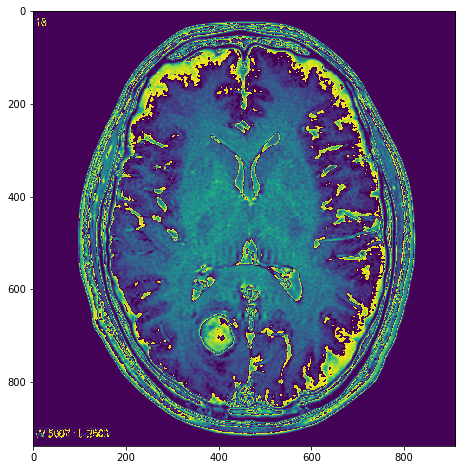

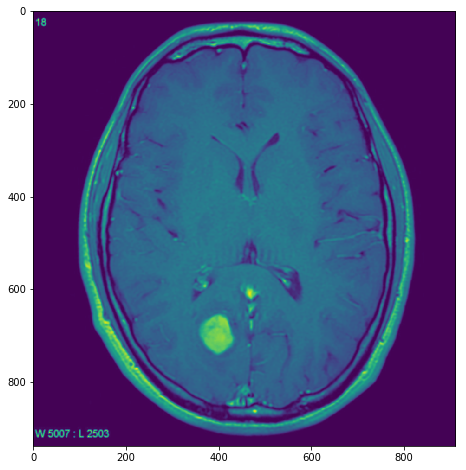

In [69]:
rho=0.05#evaporation rate
m=20#number of ants
alpha=0.05
beta=0.09
Lk=0.24
fgh2=[]
fg1=[]
import os
path="C:/Users/SHUBHAJOY/Downloads/brain-mri-images-for-brain-tumor-detection/yes/"
for root, dirs, files in os.walk(path):
        for filename in files:
            fgh2.append(cv.imread(os.path.join(path,filename)))
            fg1.append(cv.imread(os.path.join(path,filename),cv.IMREAD_GRAYSCALE))
covid=cv.imread("C:/Users/SHUBHAJOY/Desktop1-s2.0-S0140673620303706-fx1_lrg")
np1=np.full_like(fg1[114],1)
np2=np.full_like(fg1[114],1)
import random
def find_average_intensity(imk1,i,j):
    avg=0.0
    avg=(imk1[i-1][j]+imk1[i][j-1]+imk1[i][j+1]+imk1[i+1][j])/4.0
    return (avg*Lk)
#def probability(imkl,i,j):
def execute_ant_colony(imkl,imkj):
    iter5=10
    n=1
    
    for t in range(0,imkj.shape[0]-1):
        
            for t1 in range(0,imkj.shape[1]-1):
                if(imkj[t][t1]==1):
                    imkj[t][t1]=(1-rho)*imkj[t][t1]+find_average_intensity(imkl,t,t1)
                    
    while(n<iter5):
        startx=0
        starty=0
        tot_pheromone=0
        vis_x=[]
        vis_y=[]
        pher=[]
        for t in range(0,imkj.shape[0]-1):
        
            for t1 in range(0,imkj.shape[1]-1):
                    imkj[t][t1]=(1-rho)*imkj[t][t1]+find_average_intensity(imkl,t,t1)
        while(startx<(imkl.shape[1]-2) and starty<(imkl.shape[0]-2)):
            
            if(imkj[starty][startx+1]>imkj[starty+1][startx]):
                    startx=startx+1
                    tot_pheromone=tot_pheromone+imkj[starty][startx]
                    vis_x.append(startx)
                    vis_y.append(starty)
                    pher.append(imkj[starty][startx])
            else:
                    starty=starty+1
                    tot_pheromone=tot_pheromone+imkj[starty][startx]

                    vis_x.append(startx)
                    vis_y.append(starty)
                    pher.append(imkj[starty][startx])
        c=0
        if(tot_pheromone!=0):
            
            for x in range(0,len(vis_y)):
                if(c>0 and imkj[vis_y[x]][vis_x[c]]!=0):
                    imkj[vis_y[x]][vis_x[c]]=int(pher[c]/tot_pheromone*(1/abs((imkj[vis_y[x]][vis_x[c]]-imkj[vis_y[x-1]][vis_x[c-1]]))))
                else:
                    imkj[vis_y[x]][vis_x[c]]=int(pher[c]/tot_pheromone)
                c+=1
            
                    
       

                
            
            
            
                    
        n+=1
        print(n)
execute_ant_colony(fg1[114],np1)    

def show_image(imk1):
    plt.figure(figsize = (25,8))
    plt.imshow(imk1)
    plt.show()
show_image(np1)   
show_image(cv.GaussianBlur(fg1[114],(5,5),0))

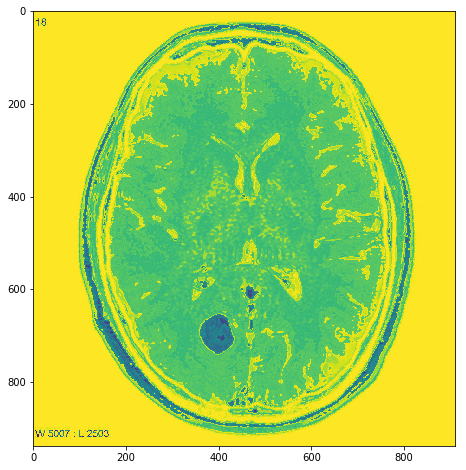

In [72]:
#show_image(cv.medianBlur(fg[100],5))
#show_image(cv.medianBlur(np1,7))
show_image(cv.bitwise_or(cv.bitwise_not(fg1[114]),np1))
th, dst = cv.threshold(np2, 255, 567, cv.THRESH_BINARY);
#print(dst.shape)
show_image(dst)